In [1]:
import re

import lyrics as ly
import json
from pathlib import Path

from spacy.lang.fr import French

def tokenize(chaine):
    return [token.text for token in tokenizer(chaine)]

def preclean(chaine):
    chaine = chaine.replace(u"\xa0", " ")
    chaine = chaine.replace(u"\u2009", " ")
    chaine = chaine.replace(u"\u200b", " ")
    chaine = chaine.replace(u"\u200c", " ")
    return chaine.replace(u"\u200d", " ")

def clean_word(word):
    try:
        word = word.strip()
    except:
        print(word)
        return
    word = word.strip(".,;“…’:!”?\"()[]{}«»×*")
    if re.fullmatch(r"((\\x)|(\\u)|(\\n)|(x?\d+)).*", word):
        return
    if '"-"' in word:
        return
    if word == 'à-ç':
        return
    if re.fullmatch('(-"?\w+)|(\w+"?-)', word):
        return
    if re.fullmatch(r"[^A-zÄ-ÿ]+", word):
        return
    if re.fullmatch(r"('+)|(\++)", word):
        return
    return word

def find_neo(songs):
    neologismes = set()

    for song in songs:
        if song.paroles:
            paroles = tokenize(preclean(song.paroles))
            for word in paroles:
                word = clean_word(word)
                if word:
                    if word.lower() not in lexique_ultime:
                        neologismes.add(word)

    return neologismes

def songs_and_neo(artiste):
    if isinstance(artiste, str | Path):
        artiste = ly.Artiste(artiste)
    songs = artiste.songs
    neologismes = find_neo(songs)
    return songs, neologismes

nlp = French()

tokenizer = nlp.tokenizer

lexiques = Path("lexiques").glob("*.json")

dict_lexiques = {
    fic.stem: set(json.load(fic.open(encoding="utf-8")))
    for fic in lexiques
}

lexique_ultime = set.union(*dict_lexiques.values())

import spacy
nlp = spacy.load("fr_core_news_sm")

In [2]:
# dict_artistes = {e : songs_and_neo(e) for e in ("Vald", "FlorentPagny", "Kaaris", "MichelSardou", "OrelSan", "Alizée")}

artistes_files = Path("Lyrics_all").glob("*.json")

dict_artistes = {
    e : songs_and_neo(e)
    for e in artistes_files
}

In [3]:
# for k, v in dict_artistes.items():
#     print(k, v[0], v[1])

In [4]:
artistes_files = Path("Lyrics_all").glob("*.json")
artistes_files = list(artistes_files)

In [18]:
e = ly.Artiste(artistes_files[457])
print(e.genres, e.name)

['Musique_folk', 'Rock_français'] Blankass


In [6]:
import pandas as pd
df = pd.DataFrame(dict_artistes).T


Nombre de neologismes : Nombre max = 758, nombre min = 149, theshold 200 = 104


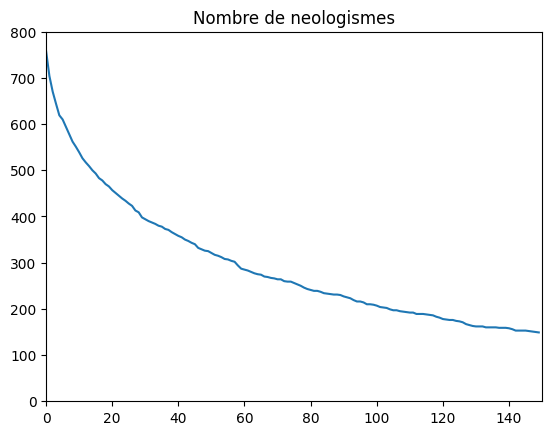

Nombre de chansons : Nombre max = 862, nombre min = 9, theshold 200 = 27


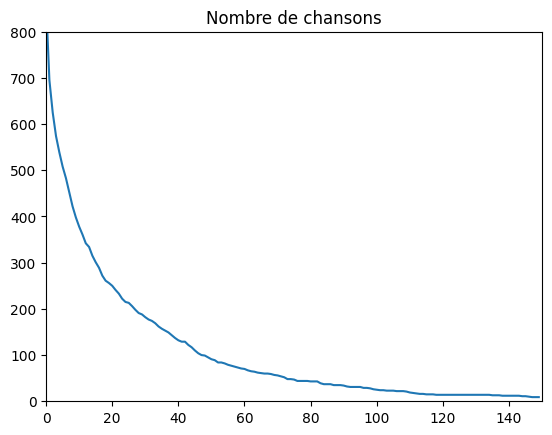

Nombre de chansons en français : Nombre max = 740, nombre min = 9, theshold 200 = 22


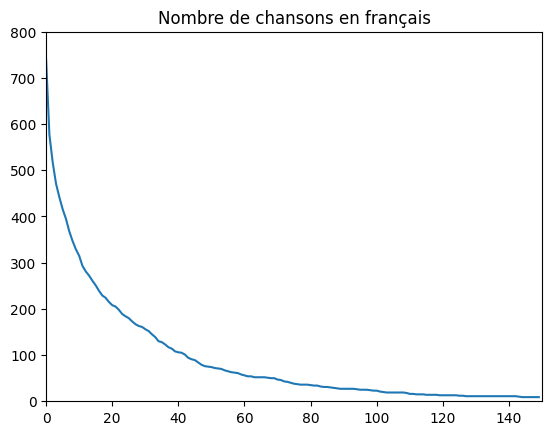

In [7]:
from matplotlib import pyplot as plt

range_max = 150
lenghts_neo = [(i, len(df[df[1].apply(lambda x : len(x) > i)])) for i in range(range_max)]
lenghts_chanson = [(i, len(df[df[0].apply(lambda x : len([e for e in x if e.paroles]) > i)])) for i in range(range_max)]
lenghts_fr_only = [(i, len(df[df[0].apply(lambda x : len([e for e in x if e.lang == "fr"]) > i)])) for i in range(range_max)]

def plotter(elt, title, range_max=range_max):
    mark = 0
    for e in elt:
        if e[1] < 201:
            mark = e[0]
            break

    print(f"{title} : Nombre max = {elt[0][1]}, nombre min = {elt[-1][1]}, theshold 200 = {mark}")

    plt.plot(*zip(*elt))
    plt.title(title)
    plt.axis((0,range_max,0,800))
    plt.show()
    # plt.plot(*zip(*elt[50:]))
    # plt.title(title)
    # plt.axis((50,200,0,800))
    # plt.show()

plotter(lenghts_neo, "Nombre de neologismes")
plotter(lenghts_chanson, "Nombre de chansons")
plotter(lenghts_fr_only, "Nombre de chansons en français")


In [8]:
df = df[df[1].apply(lambda x : len(x) > 10)]
df

,0,1
Lyrics_all/Lyrics_MelissaLaveaux.json,{I got a postman daily on my door\nHe claims h...,"{Oooh, dignity, ruthless, above, inside, built..."
Lyrics_all/Lyrics_TSRCrew.json,"{, , , Maybe you're cold, but you're so warm i...","{grêve, re-frè, Brinks, heypèpepe, célèbro, de..."
Lyrics_all/Lyrics_Eva.json,"{, , [Intro : Franglish]\nYeah (yeah)\nOuh, ou...","{smiling, reh, bendo, Pouloulop, Djazzi, exs, ..."
Lyrics_all/Lyrics_MafiaK1Fry.json,"{, [Couplet 1 : Dry]\nÀ peine seize ans, traîn...","{sista, raaf, foolek, sensimilia, Brinks, re-f..."
Lyrics_all/Lyrics_VéroniqueSanson.json,"{, , [Couplet 1]\nToute petite chanson pour to...","{Angela, allá, Noriega, lazy, Outro, Est-il, L..."
...,...,...
Lyrics_all/Lyrics_Singuila.json,"{[Intro]\nLorsqu'une femme est trop jolie, vau...","{Chirpé, singui, Tika, okokokok, magnifica, ac..."
Lyrics_all/Lyrics_ManoSolo.json,{Toutes ces chansons commencent sur un trottoi...,"{Ptetre, Cicatrisnt, beso, revien, musiue, X2,..."
Lyrics_all/Lyrics_YannTiersen.json,"{, , Instrumental, , [Instrumental], , Running...","{quietly, wither, Growing, verdad, postcards, ..."
Lyrics_all/Lyrics_Benjaminsiksou.json,{Paroles de la chanson My eternity :\nThrough ...,"{won', eternity, rainbows, raindrops, flowers,..."


In [9]:
print(df)

                                                                                        0   
Lyrics_all/Lyrics_MelissaLaveaux.json   {I got a postman daily on my door\nHe claims h...  \
Lyrics_all/Lyrics_TSRCrew.json          {, , , Maybe you're cold, but you're so warm i...   
Lyrics_all/Lyrics_Eva.json              {, , [Intro : Franglish]\nYeah (yeah)\nOuh, ou...   
Lyrics_all/Lyrics_MafiaK1Fry.json       {, [Couplet 1 : Dry]\nÀ peine seize ans, traîn...   
Lyrics_all/Lyrics_VéroniqueSanson.json  {, , [Couplet 1]\nToute petite chanson pour to...   
...                                                                                   ...   
Lyrics_all/Lyrics_Singuila.json         {[Intro]\nLorsqu'une femme est trop jolie, vau...   
Lyrics_all/Lyrics_ManoSolo.json         {Toutes ces chansons commencent sur un trottoi...   
Lyrics_all/Lyrics_YannTiersen.json      {, , Instrumental, , [Instrumental], , Running...   
Lyrics_all/Lyrics_Benjaminsiksou.json   {Paroles de la chanson My eter

In [10]:
df.to_json("neologismes.json")
df.to_csv("neologismes.csv")

In [11]:
for k, v in dict_artistes.items():
    print(f"Aritste : {k} | Nombre de chansons : {len(v[0])} | Nombre de chansons avec paroles : {len([e for e in v[0] if e.paroles])} | Nombre de neologismes : {len(v[1])}")


Aritste : Lyrics_all/Lyrics_MelissaLaveaux.json | Nombre de chansons : 6 | Nombre de chansons avec paroles : 3 | Nombre de neologismes : 27
Aritste : Lyrics_all/Lyrics_JosephRacaille.json | Nombre de chansons : 0 | Nombre de chansons avec paroles : 0 | Nombre de neologismes : 0
Aritste : Lyrics_all/Lyrics_Mokalamity.json | Nombre de chansons : 3 | Nombre de chansons avec paroles : 2 | Nombre de neologismes : 10
Aritste : Lyrics_all/Lyrics_RitaCadillac.json | Nombre de chansons : 2 | Nombre de chansons avec paroles : 0 | Nombre de neologismes : 0
Aritste : Lyrics_all/Lyrics_AntoinePaganotti.json | Nombre de chansons : 0 | Nombre de chansons avec paroles : 0 | Nombre de neologismes : 0
Aritste : Lyrics_all/Lyrics_EvelyneGirardon.json | Nombre de chansons : 0 | Nombre de chansons avec paroles : 0 | Nombre de neologismes : 0
Aritste : Lyrics_all/Lyrics_MarcCharlan.json | Nombre de chansons : 1 | Nombre de chansons avec paroles : 0 | Nombre de neologismes : 0
Aritste : Lyrics_all/Lyrics_TSR

In [12]:
nb = 0
for k, v in dict_artistes.items():
    if len(v[1]) == 0:
        nb += 1
nb


593

In [13]:
len(dict_artistes)


1351